<a href="https://colab.research.google.com/github/RoseMwangi98/CARREFOUR_ANALYSIS/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEFINING THE QUESTION**

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

**Part 1: Dimensionality Reduction**

This section of the project entails reducing your dataset to a low dimensional dataset using the t-SNE algorithm or PCA. You will be required to perform your analysis and provide insights gained from your analysis.

In [ ]:
#installing the required library that are needed
install.packages("plyr")
install.packages("tidyverse")
install.packages("skimr")
install.packages("glance_data")





Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘glance_data’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
#load the dataset
df <- read.csv("http://bit.ly/CarreFourDataset")
head(df)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
library(skimr)
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             1000  
Number of columns          16    
_______________________          
Column type frequency:           
  character                8     
  numeric                  8     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 Invoice.ID            0             1    11    11     0     1000          0
2 Branch                0             1     1     1     0        3          0
3 Customer.type         0             1     6     6     0        2          0
4 Gender                0             1     4     6     0        2          0
5 Product.line          0             1    17    22     0        6          0
6 Date                  0             1     8     9     0       89   

In [ ]:
summary(df)

  Invoice.ID           Branch          Customer.type         Gender         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Product.line         Unit.price       Quantity          Tax         
 Length:1000        Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Class :character   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Mode  :character   Median :55.23   Median : 5.00   Median :12.0880  
                    Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
                    3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
                    Max.   :99.96   Max. 

**DATA CLEANING**

In [ ]:
#finding missing values
sum(rowSums(is.na(df)))

[1] 0

In [ ]:
sum(colSums(is.na(df)))

[1] 0

In [ ]:
#finding duplicates
sum(duplicated(df))

[1] 0

**PERFORMING PCA ON THE DATASET**

In [ ]:
head(df,3)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255


In [ ]:
rownames(df)   <- df[,1]

In [ ]:
head(df,3)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255


In [ ]:
#select the numerical to perform PCA on
library(dplyr)
df <- select(df , -1,-2,-5,-13,-9,-10,-11,-16)


In [ ]:
#performing pca on the dataset.
pca.out <- prcomp(df[,c(3,4,5:8)], center = TRUE, scale = TRUE)
pca.out

Standard deviations (1, .., p=6):
[1] 1.981724e+00 1.000188e+00 9.938771e-01 2.908660e-01 2.293246e-16
[6] 1.123611e-16

Rotation (n x k) = (6 x 6):
                     PC1          PC2          PC3         PC4           PC5
Unit.price   -0.32814288  0.272421067 -0.692931068 -0.58133944 -4.791886e-16
Quantity     -0.36493444 -0.212156245  0.633463397 -0.64848801 -5.753935e-16
Tax          -0.50288256  0.005587238  0.002447344  0.28355821 -8.056725e-01
cogs         -0.50288256  0.005587238  0.002447344  0.28355821  5.175921e-01
gross.income -0.50288256  0.005587238  0.002447344  0.28355821  2.880804e-01
Rating        0.02173707  0.938447035  0.344314813  0.01708717  1.398784e-16
                       PC6
Unit.price   -9.316022e-17
Quantity     -8.513594e-17
Tax          -1.325087e-01
cogs         -6.314785e-01
gross.income  7.639872e-01
Rating       -3.772785e-17

In [ ]:
summary(pca.out)

Importance of components:
                          PC1    PC2    PC3    PC4       PC5       PC6
Standard deviation     1.9817 1.0002 0.9939 0.2909 2.293e-16 1.124e-16
Proportion of Variance 0.6545 0.1667 0.1646 0.0141 0.000e+00 0.000e+00
Cumulative Proportion  0.6545 0.8213 0.9859 1.0000 1.000e+00 1.000e+00

In [ ]:
library(devtools)
install_github("vqv/ggbiplot"

Loading required package: usethis





✔  checking for file ‘/tmp/Rtmpz7YUYB/remotes3a354cca33/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



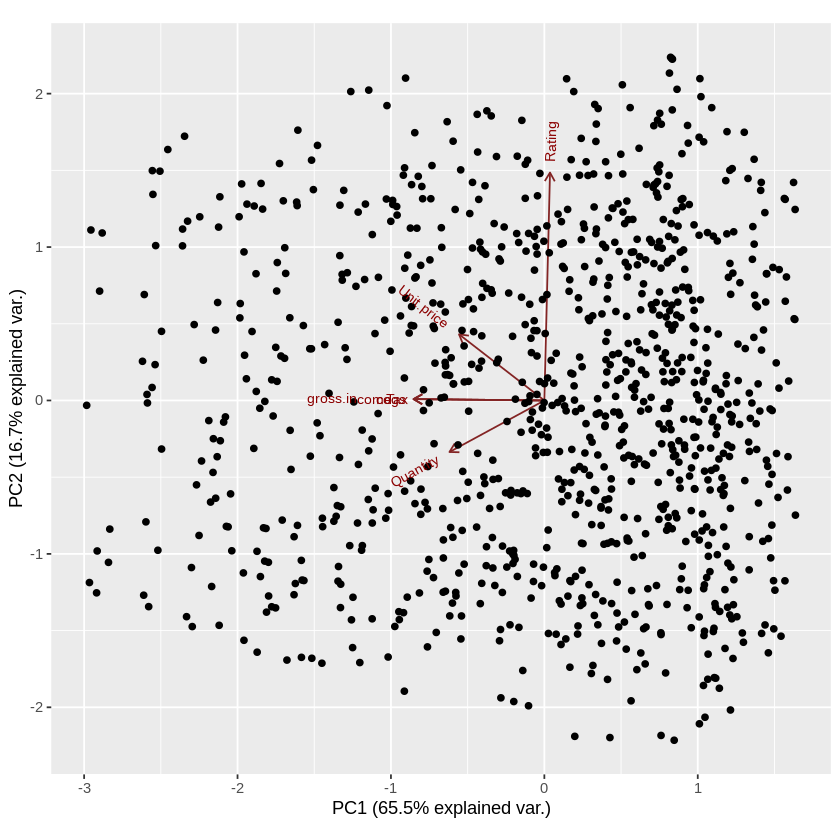

In [ ]:
#Visualizing the results
library(dplyr)
library(ggbiplot)
ggbiplot(pca.out, obs.scale = 0.1, var.scale = 0.1)

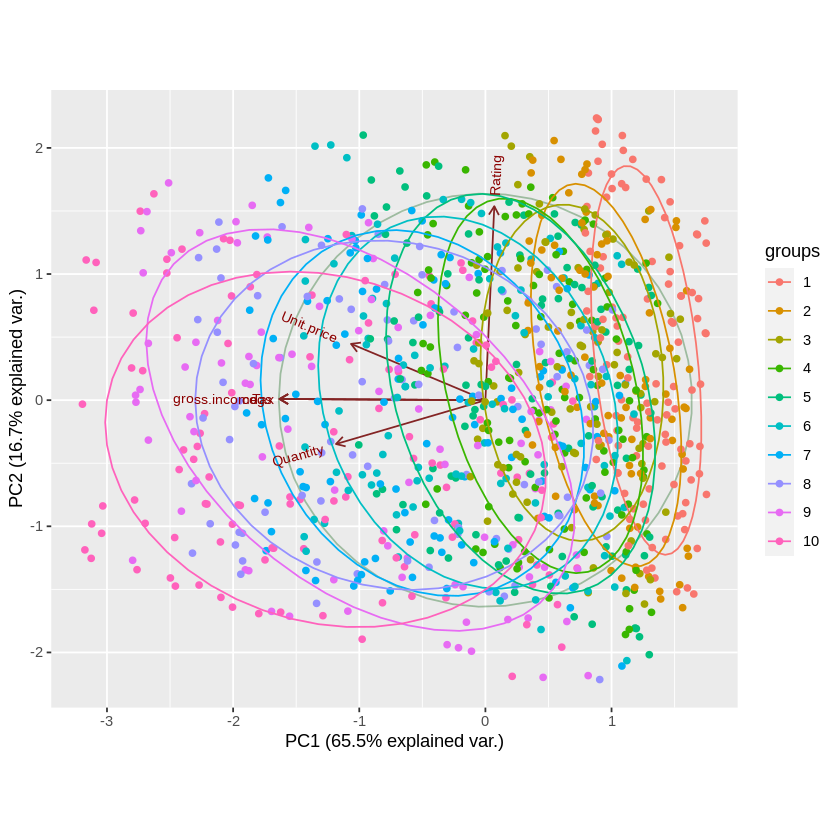

In [ ]:
library(ggbiplot)
ggbiplot(pca, obs.scale = 0.2, var.scale = 1, groups = as.factor(df$Quantity), ellipse = TRUE, circle = TRUE)

We find it difficult to derive insights from the given plot mainly because PC3 and PC4 since they have small percentages of the total variation.